# Landuse analysis with the Area lot of BBL having unmet ratio
# Author :Bhagwat Singh Bisht

In [1]:
## importing necessary files 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# read the files
totDfree = pd.read_csv('total_demand_freemins.csv',header=None,names=['BBL','FREE','DEMAND'])

In [3]:
totDfree.head(3)

,BBL,FREE,DEMAND
0,1000010010,1277,99
1,1000010101,24,4
2,1000010201,78,10


In [4]:
## checking value
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310257 entries, 0 to 310256
Data columns (total 3 columns):
BBL       310257 non-null int64
FREE      310257 non-null int64
DEMAND    310257 non-null int64
dtypes: int64(3)
memory usage: 7.1 MB


In [5]:
# calculating the ratio/metric
totDfree['RATIO'] = totDfree.DEMAND/totDfree.FREE

In [6]:
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310257 entries, 0 to 310256
Data columns (total 4 columns):
BBL       310257 non-null int64
FREE      310257 non-null int64
DEMAND    310257 non-null int64
RATIO     310257 non-null float64
dtypes: float64(1), int64(3)
memory usage: 9.5 MB


In [7]:
# reading the borough information 
all_borough = pd.read_csv('ALL_borough.csv')

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,20,22,23,24,25,66,67,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
all_borough.head(3)

,Unnamed: 0,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,0,MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,...,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16v1
1,1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,...,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16v1
2,2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,...,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,16v1


In [9]:
all_borough.columns

Index([u'Unnamed: 0', u'Borough', u'Block', u'Lot', u'CD', u'CT2010',
       u'CB2010', u'SchoolDist', u'Council', u'ZipCode', u'FireComp',
       u'PolicePrct', u'HealthArea', u'SanitBoro', u'SanitDistrict',
       u'SanitSub', u'Address', u'ZoneDist1', u'ZoneDist2', u'ZoneDist3',
       u'ZoneDist4', u'Overlay1', u'Overlay2', u'SPDist1', u'SPDist2',
       u'LtdHeight', u'AllZoning1', u'AllZoning2', u'SplitZone', u'BldgClass',
       u'LandUse', u'Easements', u'OwnerType', u'OwnerName', u'LotArea',
       u'BldgArea', u'ComArea', u'ResArea', u'OfficeArea', u'RetailArea',
       u'GarageArea', u'StrgeArea', u'FactryArea', u'OtherArea', u'AreaSource',
       u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal', u'LotFront',
       u'LotDepth', u'BldgFront', u'BldgDepth', u'Ext', u'ProxCode',
       u'IrrLotCode', u'LotType', u'BsmtCode', u'AssessLand', u'AssessTot',
       u'ExemptLand', u'ExemptTot', u'YearBuilt', u'BuiltCode', u'YearAlter1',
       u'YearAlter2', u'HistDist', u'Land

In [10]:
## selecting column of interest

all_borough1 = all_borough[['BBL','Borough','LotArea','LandUse','BldgArea']]

In [11]:
# merging the two dataset
totDfree = totDfree.merge(all_borough1, on='BBL', how='inner')


In [12]:
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310257 entries, 0 to 310256
Data columns (total 8 columns):
BBL         310257 non-null int64
FREE        310257 non-null int64
DEMAND      310257 non-null int64
RATIO       310257 non-null float64
Borough     310257 non-null object
LotArea     310257 non-null int64
LandUse     308620 non-null float64
BldgArea    310257 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 21.3+ MB


In [13]:
totDfree.head(2)

,BBL,FREE,DEMAND,RATIO,Borough,LotArea,LandUse,BldgArea
0,1000010010,1277,99,0.077525,MN,7736692,8.0,2725731
1,1000010101,24,4,0.166667,MN,541886,8.0,541886


In [14]:
totDfree[totDfree.BBL<0]

,BBL,FREE,DEMAND,RATIO,Borough,LotArea,LandUse,BldgArea


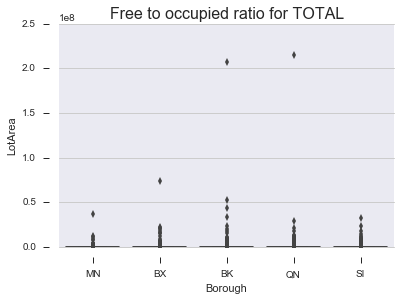

In [15]:
plt.title('Free to occupied ratio for TOTAL',size = 16)
sns.set(style="ticks")
sns.boxplot(x="Borough", y="LotArea", data=totDfree, palette="PRGn")
sns.despine(offset=10, trim=True)
#plt.savefig('Total_free_tooccupiedratio.jpg')

# Creating buckets for analysis 

In [16]:
#Descriptive statistic for Ratio
totDfree.RATIO.describe()

count    310257.000000
mean          0.050412
std           0.087643
min           0.000063
25%           0.008081
50%           0.022671
75%           0.059951
max           5.500000
Name: RATIO, dtype: float64

# Here we are doing lot area analysis for top 40 bbl across borough using percentile

In [17]:
## to check the mean of demand across borough 
totDfree.groupby('Borough')['DEMAND'].mean()

Borough
BK      74.137315
BX      36.932120
MN    3264.197352
QN     130.022707
SI       1.878395
Name: DEMAND, dtype: float64

In [18]:
# checking 99th percentile value to do analysis on top 1 percentile
totDfree.groupby('Borough').agg(lambda x: np.percentile(x['DEMAND'], q = 99))['DEMAND']

Borough
BK     1302.00
BX      539.00
MN    46802.75
QN     1228.95
SI       14.08
Name: DEMAND, dtype: float64

In [19]:
totDfree.head(2)

,BBL,FREE,DEMAND,RATIO,Borough,LotArea,LandUse,BldgArea
0,1000010010,1277,99,0.077525,MN,7736692,8.0,2725731
1,1000010101,24,4,0.166667,MN,541886,8.0,541886


In [20]:
# def sel(x):
#     if (x['Borough']=='MN') & (x['DEMAND']>3264):
#         return 1
#     elif (x['Borough']=='BK') & (x['DEMAND']>74):
#         return 1
#     elif (x['Borough']=='BX') &(x['DEMAND']>36):
#         return 1
#     if (x['Borough']=='QN') & (x['DEMAND']>130):
#         return 1
    

In [21]:
# rough = totDfree.apply(lambda x: x if (sel(x)) else 0,axis=1)

In [22]:
# BK     1302.00
# BX      539.00
# MN    46802.75
# QN     1228.95
# SI       14.08

In [23]:
totDfree_MN = totDfree[(totDfree.Borough=='MN') & (totDfree.DEMAND>46802)]
totDfree_BK = totDfree[(totDfree.Borough=='BK') & (totDfree.DEMAND>1302)]
totDfree_BX = totDfree[(totDfree.Borough=='BX') & (totDfree.DEMAND>539)]
totDfree_QN = totDfree[(totDfree.Borough=='QN') & (totDfree.DEMAND>1228)]

In [24]:
totDfree_MN.describe()

,BBL,FREE,DEMAND,RATIO,LotArea,LandUse,BldgArea
count,4.240000e+02,4.240000e+02,4.240000e+02,424.000000,4.240000e+02,421.000000,4.240000e+02
mean,1.010087e+09,5.639683e+05,9.341470e+04,0.178942,1.832356e+05,5.149644,6.975345e+05
std,3.698853e+06,8.228471e+05,1.180809e+05,0.052643,1.796532e+06,1.642858,8.680026e+05
min,1.000030e+09,1.481660e+05,4.681900e+04,0.016797,0.000000e+00,2.000000,0.000000e+00
25%,1.008009e+09,3.154555e+05,5.502050e+04,0.143700,2.238625e+04,4.000000,2.067800e+05
50%,1.010209e+09,4.011635e+05,6.620150e+04,0.172284,3.616550e+04,5.000000,4.814395e+05
75%,1.012858e+09,5.767230e+05,9.313250e+04,0.207532,7.796650e+04,5.000000,9.235358e+05
max,1.021380e+09,1.468071e+07,1.795559e+06,0.376146,3.659000e+07,11.000000,8.942176e+06


In [25]:
totDfree_tot = pd.concat([totDfree_MN,totDfree_BK,totDfree_BX,totDfree_QN])

In [26]:
totDfree_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3079 entries, 7 to 306582
Data columns (total 8 columns):
BBL         3079 non-null int64
FREE        3079 non-null int64
DEMAND      3079 non-null int64
RATIO       3079 non-null float64
Borough     3079 non-null object
LotArea     3079 non-null int64
LandUse     3051 non-null float64
BldgArea    3079 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 216.5+ KB


In [27]:
tot = totDfree_tot.dropna()

In [28]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 7 to 306582
Data columns (total 8 columns):
BBL         3051 non-null int64
FREE        3051 non-null int64
DEMAND      3051 non-null int64
RATIO       3051 non-null float64
Borough     3051 non-null object
LotArea     3051 non-null int64
LandUse     3051 non-null float64
BldgArea    3051 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 214.5+ KB


In [29]:
#taking log of Bldg Area
tot['BldgArea_log']=np.log10(tot.BldgArea)

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
tot.head()

,BBL,FREE,DEMAND,RATIO,Borough,LotArea,LandUse,BldgArea,BldgArea_log
7,1000030001,800214,72660,0.090801,MN,945425,9.0,945425,5.975627
9,1000030003,711844,59420,0.083473,MN,33600,9.0,0,-inf
12,1000047501,925848,88601,0.095697,MN,111382,5.0,1888126,6.276031
73,1000160120,427236,54851,0.128386,MN,94530,5.0,1501878,6.176635
75,1000160140,263908,50344,0.190763,MN,82617,5.0,2233692,6.349023


In [31]:
tot.LandUse.value_counts()

5.0     1046
4.0      933
3.0      230
8.0      223
7.0      141
9.0      127
2.0      113
10.0      80
6.0       77
11.0      61
1.0       20
Name: LandUse, dtype: int64

In [32]:
## REMOVING THE CONDITION 
tot1 = tot[(tot.BldgArea!=0)]

In [33]:
tot1.head(5)

,BBL,FREE,DEMAND,RATIO,Borough,LotArea,LandUse,BldgArea,BldgArea_log
7,1000030001,800214,72660,0.090801,MN,945425,9.0,945425,5.975627
12,1000047501,925848,88601,0.095697,MN,111382,5.0,1888126,6.276031
73,1000160120,427236,54851,0.128386,MN,94530,5.0,1501878,6.176635
75,1000160140,263908,50344,0.190763,MN,82617,5.0,2233692,6.349023
88,1000160260,522085,69085,0.132325,MN,97076,5.0,2152863,6.333016


In [34]:
bbl_mean = pd.read_excel('BBL_code_meaning.xlsx')

In [35]:
bbl_mean.head(3)

,Code,Desc
0,1,One &Two Family Buildings
1,2,Multi-Family Walk-Up Buildings
2,3,Multi-Family Elevator Buildings


In [36]:
tot1 = tot1.merge(bbl_mean,how='inner',left_on='LandUse',right_on='Code')

In [37]:
tot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2830
Data columns (total 11 columns):
BBL             2831 non-null int64
FREE            2831 non-null int64
DEMAND          2831 non-null int64
RATIO           2831 non-null float64
Borough         2831 non-null object
LotArea         2831 non-null int64
LandUse         2831 non-null float64
BldgArea        2831 non-null int64
BldgArea_log    2831 non-null float64
Code            2831 non-null int64
Desc            2831 non-null object
dtypes: float64(3), int64(6), object(2)
memory usage: 265.4+ KB


In [38]:
tot1 = tot1.rename(columns={'Desc':'Landuse_type','RATIO':'Unmet_Ratio'})

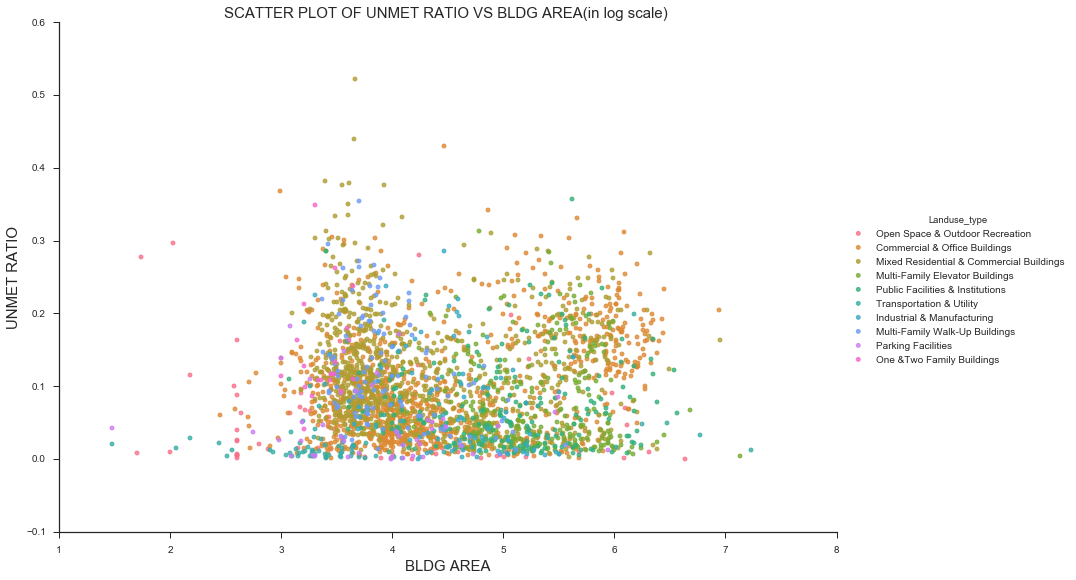

In [39]:
sns.set_context("notebook", font_scale=1.0)
sns.set_style("ticks")

sns.lmplot(x='BldgArea_log', y='Unmet_Ratio', 
           data=tot1,  
           fit_reg=False,
           hue='Landuse_type',
           aspect=1.5,
           size=8,
           scatter_kws={"marker": "0","linewidth":"1",
                        "s": 15})
plt.title('SCATTER PLOT OF UNMET RATIO VS BLDG AREA(in log scale) ',fontsize=15)
plt.xlabel('BLDG AREA',fontsize=15)
plt.ylabel('UNMET RATIO',fontsize=15)
plt.savefig('all_unmetvslotarea.jpg')

In [40]:
tot_6 = tot1[tot1.LandUse<7]
tot_7 = tot1[tot1.LandUse>6]

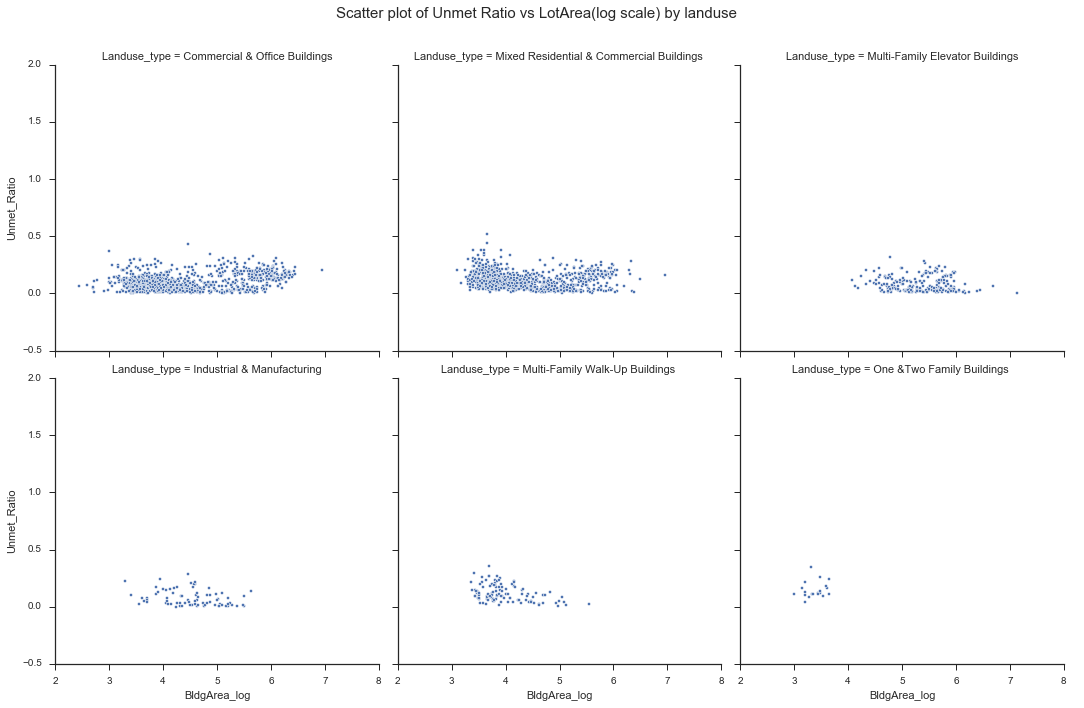

In [41]:
kws = dict(s=10, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tot_6, col="Landuse_type",col_wrap=3, palette="Set2",size=5,ylim=(-.5,2),aspect=1)
g = (g.map(plt.scatter, "BldgArea_log", "Unmet_Ratio", **kws).add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter plot of Unmet Ratio vs LotArea(log scale) by landuse ',fontsize=15)
g.savefig('top6landuse.jpg')

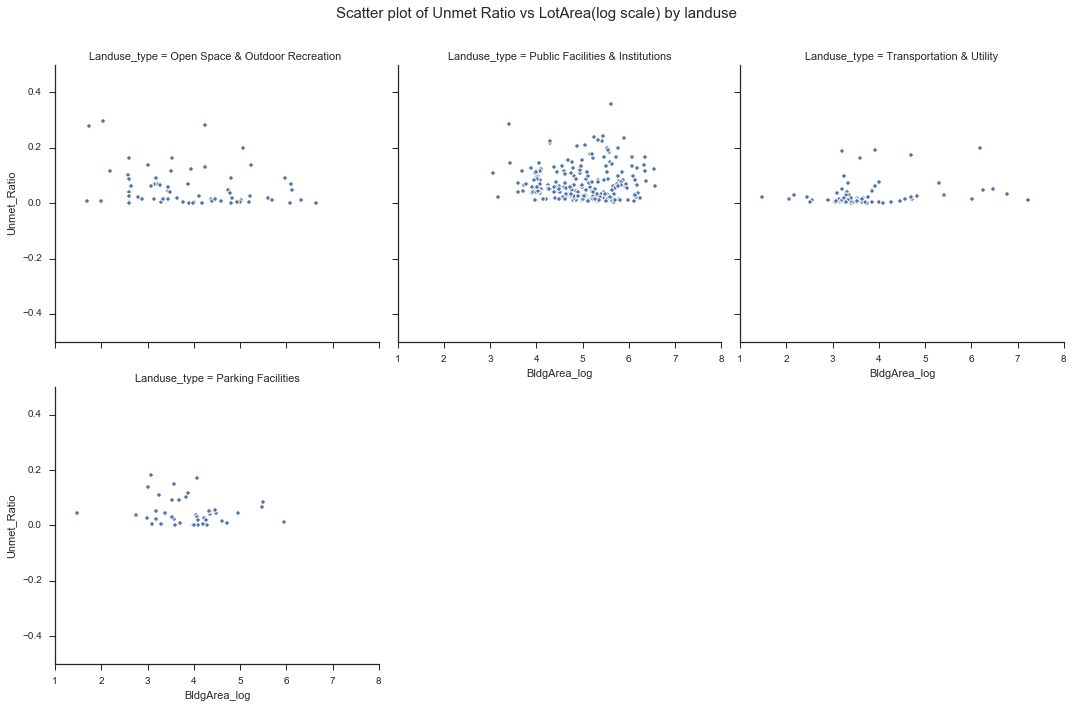

In [42]:
kws = dict(s=20, linewidth=1, edgecolor="w")
g = sns.FacetGrid(tot_7, col="Landuse_type",col_wrap=3, palette="Set1",size=5,ylim=(-.5,.5),aspect=1)
g = (g.map(plt.scatter, "BldgArea_log", "Unmet_Ratio", **kws).add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter plot of Unmet Ratio vs LotArea(log scale) by landuse ',fontsize=15)
g.savefig('bottom5landuse.jpg')

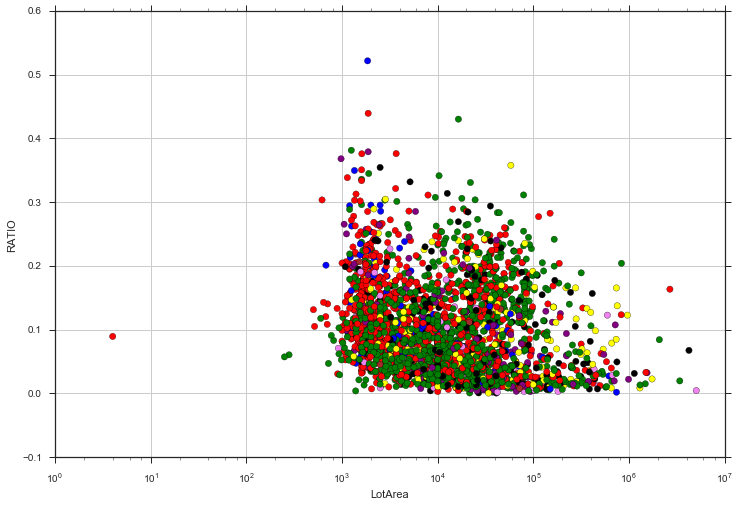

In [43]:
fig = plt.figure(figsize=(12,8))  ##c='Code',label=\
ax = fig.add_subplot(111)
color_dict1 = { 1:'brown', 2:'blue',3:'black',4:'red',5:'green',6:'purple',8:'yellow',10:'purple',11:'violet' }

tot[(tot.LotArea!=0) & (tot.LandUse!=7) & (tot.LandUse!=9) ].\
plot(kind='scatter',x='LotArea',y='RATIO',s=40,logx=True,c=[ color_dict1[i] for i in 
                                                       tot[(tot.LandUse!=7) & (tot.LandUse!=9)]['LandUse'] ],
     ax=ax)
plt.grid()

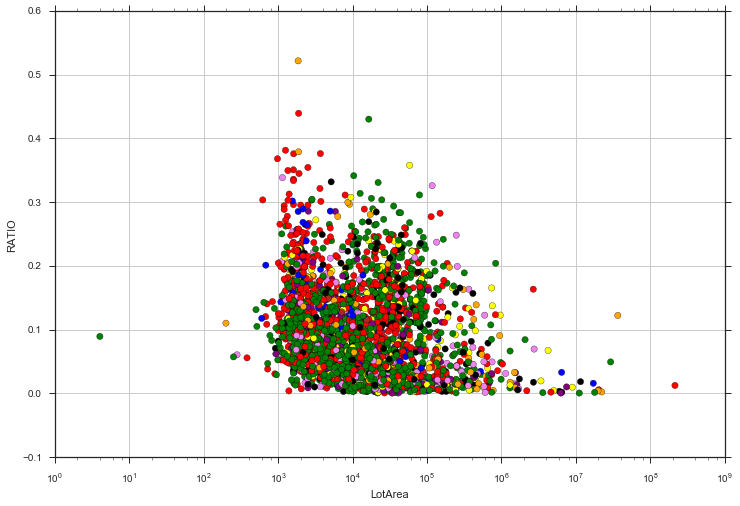

In [44]:
fig = plt.figure(figsize=(12,8))  ##c='Code',label=\
ax = fig.add_subplot(111)
color_dict1 = { 1:'brown', 2:'blue',3:'black',4:'red',5:'green',6:'purple',7:'violet',8:'yellow',9:'orange',10:'purple',11:'violet' }

tot[(tot.LotArea!=0) ].\
plot(kind='scatter',x='LotArea',y='RATIO',s=40,logx=True,c=[ color_dict1[i] for i in 
                                                       tot['LandUse'] ],
     ax=ax)
plt.grid()